Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

**Processamento de Imagens Digitais**

Professor Leandro Alves Neves

Alunos: 
* Giovanna Carreira Marinho;
* Guilherme Francisco de Andrade Campos;
* Julia Rodrigues Gubolin;
* Thales Ricardo de Souza Lopes.

In [ ]:
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage import data, img_as_float, img_as_ubyte
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import math
import numpy as np
import cv2
import skimage
from google.colab.patches import cv2_imshow

**Aula 7 - Modelos de Cores e Fatiamento**

**Exercício 2**: Escreva um programa que receba as imagens indicadas no slide e aplique o processo de transformação de cores: equalização de histograma. Apresentar os histogramas equalizados e as imagens obtidas.

**Exercício 3**: Escreva um programa que receba as imagens indicadas no slide, converta para o padrão HSI e aplique o processo de transformações de cores: equalização de histograma. Apresentar os histogramas equalizados. Observe os resultados dos exercícios 2 e 3. Indique, se possível, qual estratégia forneceu os melhores resultados e justifique sua resposta.

# Exercício 2 e 3 

O bloco a seguir cria uma função responsável por plotar a imagem, seu histograma e histograma cumulativo. Em seu desenvolvimento são feitas algumas configurações nos eixos dos *plots*.

In [ ]:
def plot_img_and_hist(image, axes, bins=256):
    image = img_as_float(image) #convertendo a imagem para float para próximos calculos
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    ax_img.imshow(image, cmap=plt.cm.gray) #exibindo a imagem
    ax_img.set_axis_off()

    ax_hist.hist(image.ravel(), bins=bins, color='black') #exibindo o histograma
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Intensidade dos Pixels')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    img_cdf, bins = exposure.cumulative_distribution(image, bins) #calculando o histograma cumulativo
    ax_cdf.plot(bins, img_cdf, 'r') #exibindo
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf #retornando os plots

Essa outra função, por meio do uso da anterior, faz a leitura de uma imagem (exibe o histograma e histograma cumulativo), realiza o processo de equalização (também exibindo o resultado) e realiza a equalização da image no canal HSV.

In [ ]:
def plot_result(img):
  fig = plt.figure(figsize=(15, 7)) #definindo os sub-plots
  axes = np.zeros((2, 3), dtype=object)
  axes[0, 0] = plt.subplot(2, 3, 1)
  axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
  axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
  axes[1, 0] = plt.subplot(2, 3, 4)
  axes[1, 1] = plt.subplot(2, 3, 5)
  axes[1, 2] = plt.subplot(2, 3, 6)

  ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0]) #capturando os plots para a imagem original
  ax_img.set_title('Imagem RGB')
  ax_hist.set_ylabel('Quantidade de pixels')
  y_min, y_max = ax_hist.get_ylim()
  ax_hist.set_yticks(np.linspace(0, y_max, 5))
  
  img_eq = exposure.equalize_hist(img) #equalizando a imagem
  ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 1]) #capturando os plots para a imagem equalizada
  ax_img.set_title('RGB Equalizada')

  hsv_img = rgb2hsv(img) #convertendo a imagem para hsv
  hsv_img[:, :, 2] = exposure.equalize_hist(hsv_img[:, :, 2]) #equalizando o canal V, apenas
  ax_img, ax_hist, ax_cdf = plot_img_and_hist(hsv2rgb(hsv_img), axes[:, 2]) #capturando os plots para a imagem em rgb (RGB -> HSV -> equaliza V -> RGB)
  ax_img.set_title('HSV Equalizada')
  ax_cdf.set_ylabel('Fração da intensidade')
  ax_cdf.set_yticks(np.linspace(0, 1, 5))

  fig.tight_layout()
  plt.show()

Realizando os testes para as imagens solicitadas.

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


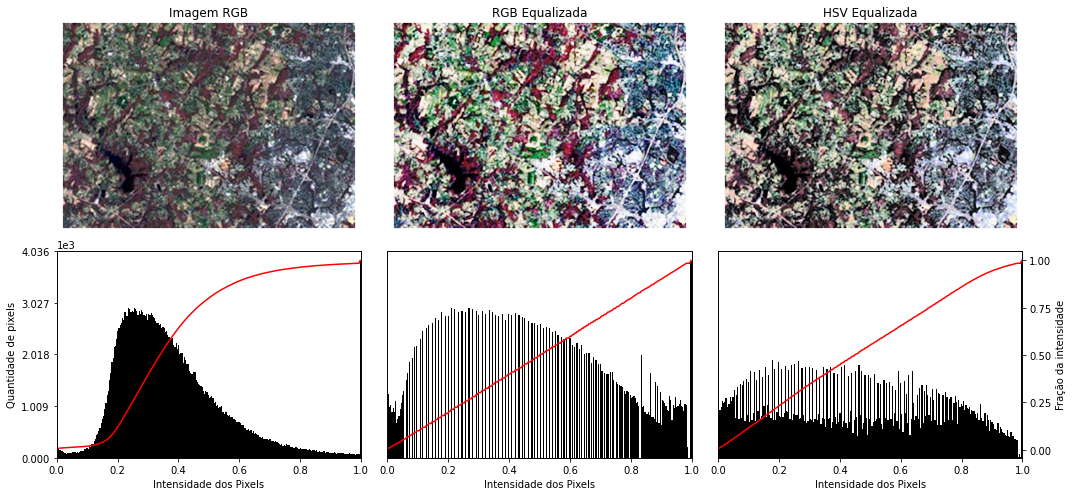

In [ ]:
img1 = skimage.io.imread('/content/Img1.bmp')
plot_result(img1)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


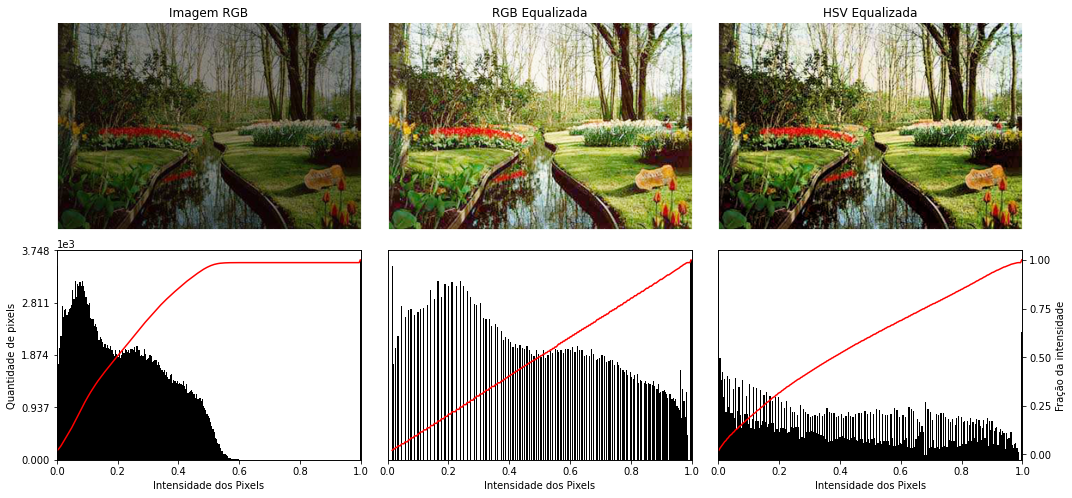

In [ ]:
img2 = skimage.io.imread('/content/Img2.bmp')
plot_result(img2)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


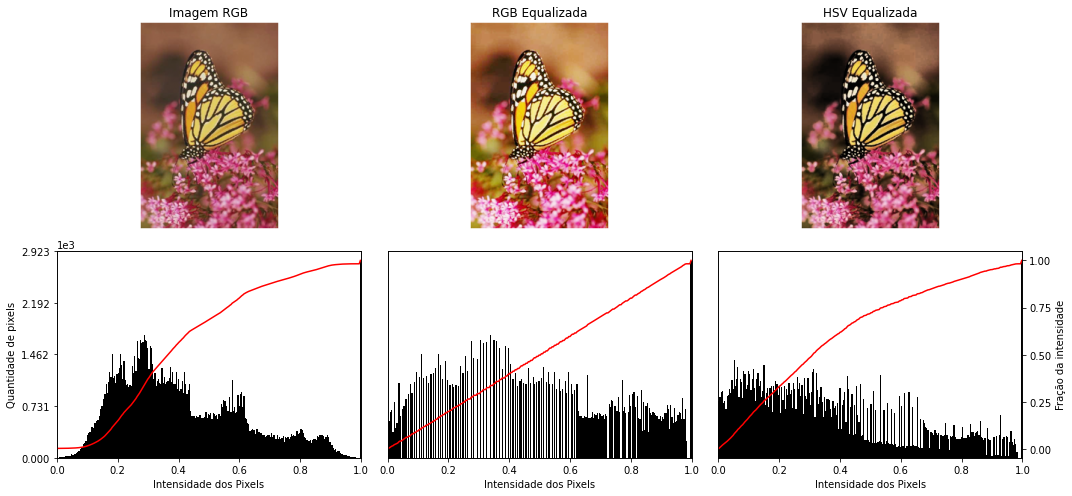

In [ ]:
img3 = skimage.io.imread('/content/Img3.bmp')
plot_result(img3)

Ao realizar a conversão para HSV, equalizando o canal V e voltando para RGB, foi possível analisar que o resultado é visualmente melhor. O histograma cumulativo não é uma função identidade, mas analisando a distribuiçao das intensidades houve um melhor resultado. Nesse caso, como foi utilizado o modelo HSV, a informação de brilho/luminância foi equalizada e não houve distorção nas informações de cromaticidade.

**Exercício 5**: Considere a imagem indicada no slide (Padronizada em RGB). Crie um programa para realizar o processo de fatiamento por intensidades. Cada intensidade deve ser associada a uma cor.

# Exercício 5


Realizando o processo por meio da substituição de cada intensidade por uma matiz (no caso V de HSV).

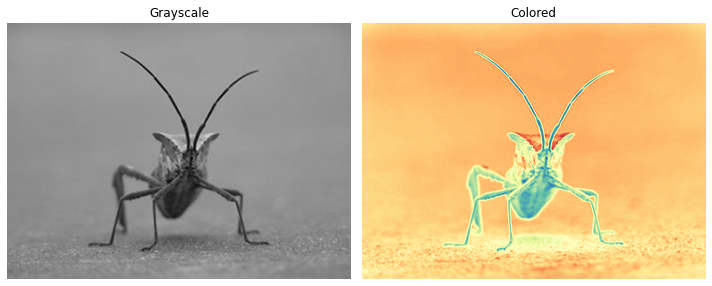

In [ ]:
img5 = skimage.io.imread('/content/Img5.bmp')
hsv_img = rgb2hsv(img5) #convertendo a imagem para hsv
hue_img = hsv_img[:, :, 2] #capturando o V

#exibindo o resultado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 10))
ax0.imshow(img5)
ax0.set_title("Grayscale")
ax0.axis('off')
ax1.imshow(hue_img, cmap='Spectral_r')
ax1.set_title("Colored")
ax1.axis('off')
fig.tight_layout()

Fatiamento por intensidades por atribuição de cores à pixels.

O método a seguir, recebe uma lista de limiares e cores e, de acordo com a intensidade de um pixel, ele atribui a respectiva cor ao resultado.

In [ ]:
def our_digitize(image, thresholds, colors):
  row, column = image.shape
  regions = np.zeros((row, column, 3)) #criando uma imagem vazia para armazenar o resultado
  
  for i in range(row):
    for j in range(column): #iterando sobre as linhas i e colunas j da imagem
      for k in range(len(thresholds) - 1): #iterando sobre os pontos de cortes e verificando se a intensidade do pixel para atribuir a classe ao resultado
        if thresholds[k] <= image[i, j] < thresholds[k + 1]:
          regions[i, j, :] = colors[k]

  return regions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


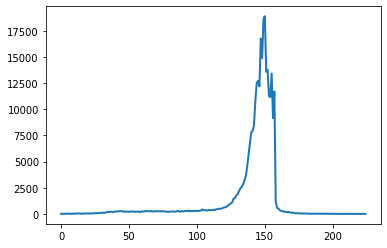

In [ ]:
hist, hist_centers = exposure.histogram(img_as_ubyte(img5)) #analisando o histograma
plt.plot(hist_centers, hist, lw=2)

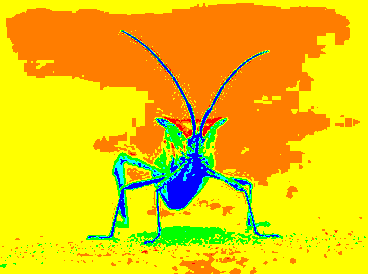

In [ ]:
img5 = imread('/content/Img5.bmp', as_gray=True)*255
img5_fat = our_digitize(image = img5, 
                        thresholds = [0, 65, 80, 120, 150, 170, 210, 256], 
                        colors = [[255,0,0], [255,255,0], [0,255,0], [0,255,255], [0,125,255], [0,0,255], [0,0,125]])
cv2_imshow(img5_fat)

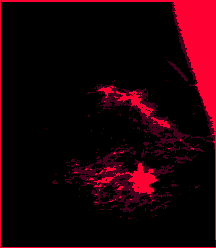

In [ ]:
mammogram = imread('/content/mammogram.bmp', as_gray=True)
mammogram_fat = our_digitize(image = mammogram, 
                        thresholds = [0, 100, 130, 256], 
                        colors = [[0,0,0], [30,0,70], [50,0,255]])
cv2_imshow(mammogram_fat)

# Referências

https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_local_equalize.html